In [1]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from turbine_regression import get_origin_data
from turbine_regression import data_sample
from turbine_regression import eturb_m1_regression_all
from turbine_regression import eturb_m2_regression_all
from turbine_regression import bturb_m1_regression_all

%matplotlib inline
# sns.set_theme(color_codes=True)
plt.style.use('seaborn-whitegrid')

# 1.汽机实时运行数据

In [2]:
df = get_origin_data(period = 7)
# eturb_m1 data
eturb_m1 = df[[
    "eturb_m1_steam_flow_in",
    "eturb_m1_steam_flow_side",
    "eturb_m1_electricity_generation",
]]
# eturb_m2 data
eturb_m2 = df[[
    "eturb_m2_steam_flow_in",
    "eturb_m2_steam_flow_side",
    "eturb_m2_electricity_generation",
]]
# bturb_m1 data
# bturb_m1 = df[[
#     "bturb_m1_steam_flow_in",
#     "bturb_m1_electricity_generation"
# ]]

# 2.汽机模型

In [3]:
# -------------------------
# 原始数据回归
# -------------------------
# eturb_m1
eturb_m1_result = eturb_m1_regression_all(df, is_export_csv = 0)
print("-" * 50)
print("eturb_m1 all data regression result:\n", eturb_m1_result)

eturb_m2_result = eturb_m2_regression_all(df, is_export_csv = 0)
print("-" * 50)
print("eturb_m2 all data regression result:\n", eturb_m2_result)

# bturb_m1
# bturb_m1_result = bturb_m1_regression_all(bturb_m1_all, is_export_csv = 0)
# print("-" * 50)
# print("bturb_m1 all data regression result:\n", bturb_m1_result)

--------------------------------------------------
eturb_m1 all data regression result:
    eturb_m1_origin_k1  eturb_m1_origin_k2  eturb_m1_origin_b  \
0            0.200035             0.02172           -5.74647   

   eturb_m1_origin_R2  
0            0.899066  
--------------------------------------------------
eturb_m2 all data regression result:
    eturb_m2_origin_k1  eturb_m2_origin_k2  eturb_m2_origin_b  \
0            0.147398            0.002715          -1.016154   

   eturb_m2_origin_R2  
0            0.707834  


# 3.数据分析

## 4.1 1# 汽机流量与发电功率散点图

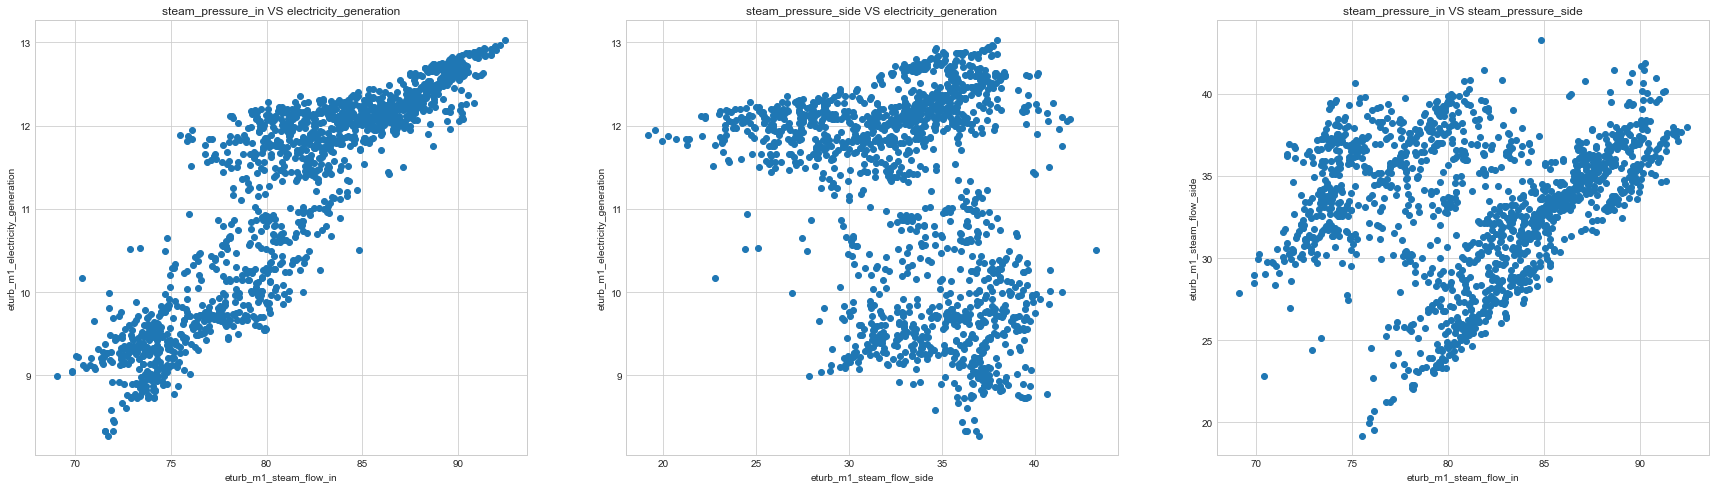

In [18]:
fig, axs = plt.subplots(figsize = (30, 8))
plt.subplot(1, 3, 1)
plt.scatter(df["eturb_m1_steam_flow_in"], df["eturb_m1_electricity_generation"])
plt.title("steam_pressure_in VS electricity_generation")
plt.xlabel("eturb_m1_steam_flow_in")
plt.ylabel("eturb_m1_electricity_generation")
plt.subplot(1, 3, 2)
plt.scatter(df["eturb_m1_steam_flow_side"], df["eturb_m1_electricity_generation"])
plt.title("steam_pressure_side VS electricity_generation")
plt.xlabel("eturb_m1_steam_flow_side")
plt.ylabel("eturb_m1_electricity_generation")
plt.subplot(1, 3, 3)
plt.scatter(df["eturb_m1_steam_flow_in"], df["eturb_m1_steam_flow_side"])
plt.title("steam_pressure_in VS steam_pressure_side")
plt.xlabel("eturb_m1_steam_flow_in")
plt.ylabel("eturb_m1_steam_flow_side")
plt.show()

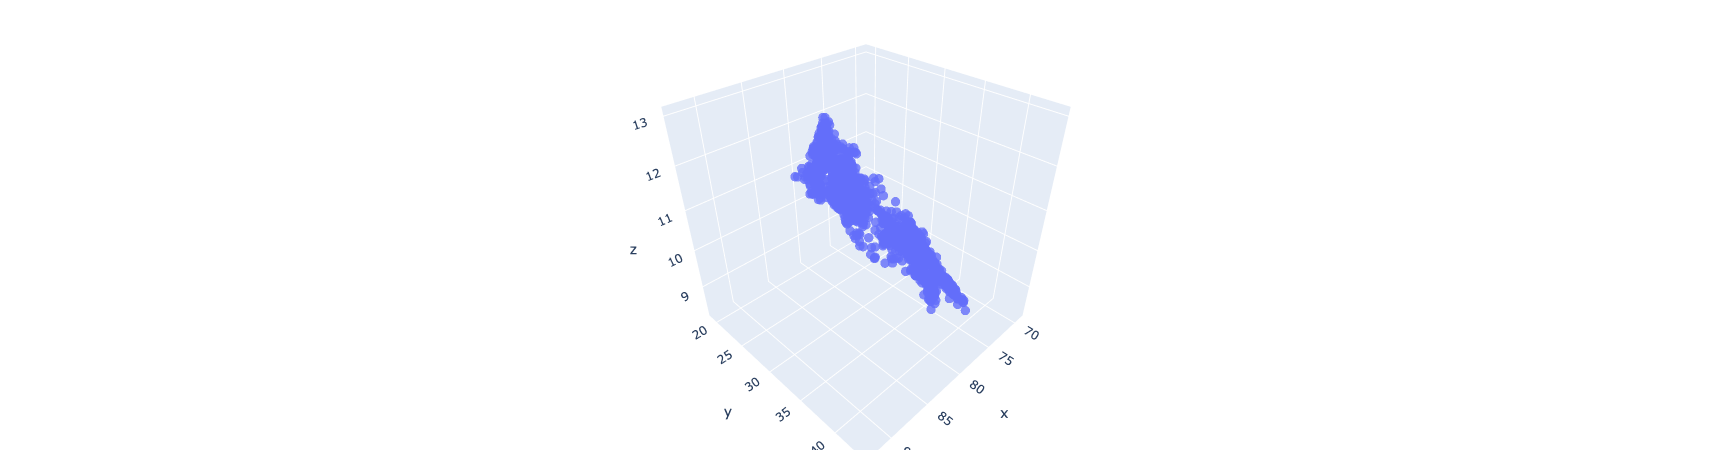

In [7]:
import plotly.graph_objects as go

fig = go.Figure(data = [go.Scatter3d(
    x = df["eturb_m1_steam_flow_in"],
    y = df["eturb_m1_steam_flow_side"],
    z = df["eturb_m1_electricity_generation"],
    mode = 'markers',
    marker = dict(
        size = 3,
        # color=z,                # set color to an array/list of desired values
        # colorscale='Viridis',   # choose a colorscale
        opacity = 0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## 4.2 2# 汽机进汽流量与发电功率相关关系散点图

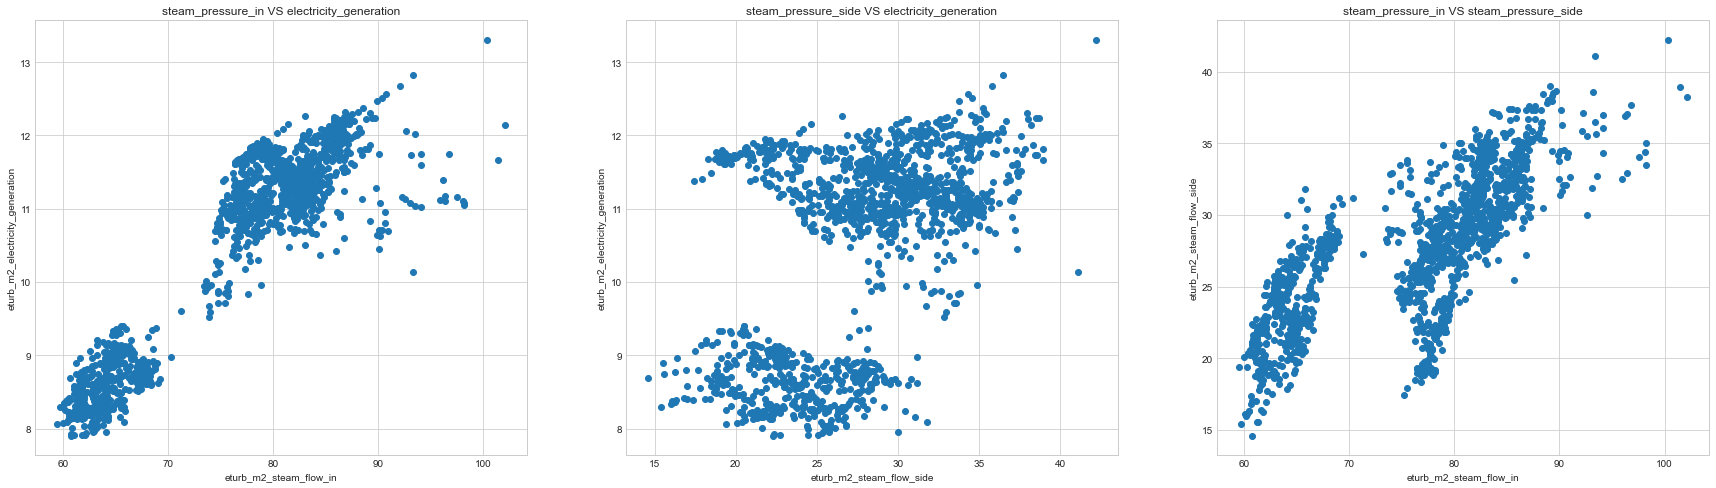

In [17]:
fig, axs = plt.subplots(figsize = (30, 8))
plt.subplot(1, 3, 1)
plt.scatter(df["eturb_m2_steam_flow_in"], df["eturb_m2_electricity_generation"])
plt.title("steam_pressure_in VS electricity_generation")
plt.xlabel("eturb_m2_steam_flow_in")
plt.ylabel("eturb_m2_electricity_generation")
plt.subplot(1, 3, 2)
plt.scatter(df["eturb_m2_steam_flow_side"], df["eturb_m2_electricity_generation"])
plt.title("steam_pressure_side VS electricity_generation")
plt.xlabel("eturb_m2_steam_flow_side")
plt.ylabel("eturb_m2_electricity_generation")
plt.subplot(1, 3, 3)
plt.scatter(df["eturb_m2_steam_flow_in"], df["eturb_m2_steam_flow_side"])
plt.title("steam_pressure_in VS steam_pressure_side")
plt.xlabel("eturb_m2_steam_flow_in")
plt.ylabel("eturb_m2_steam_flow_side")
plt.show()

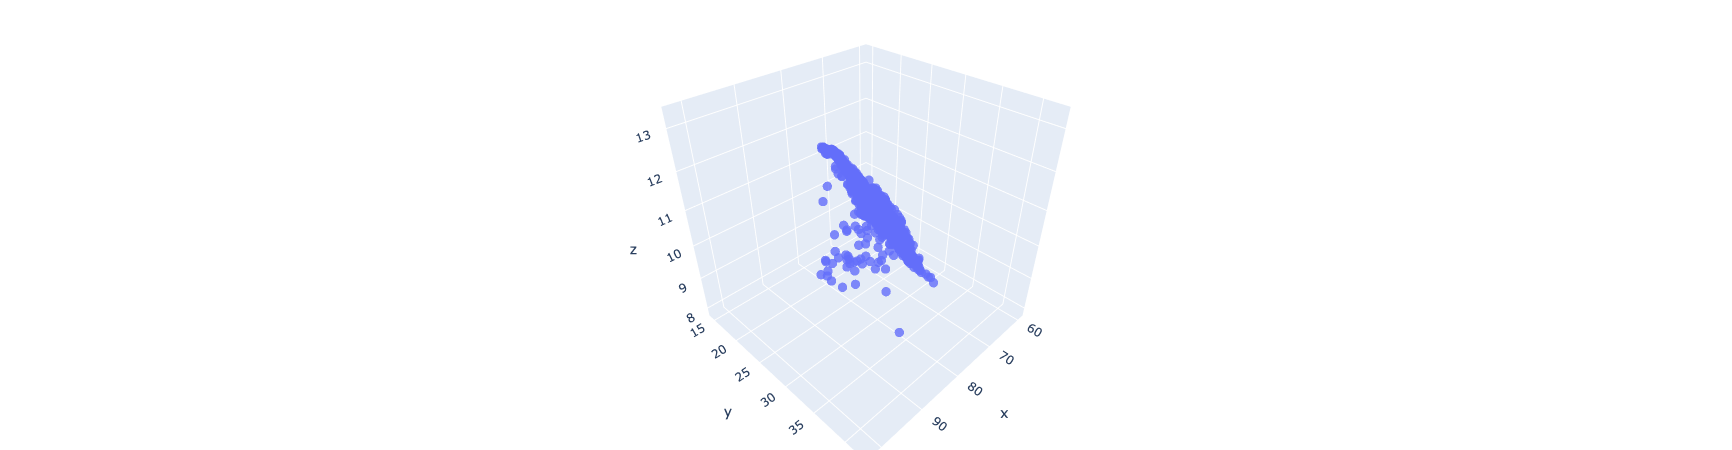

In [9]:
import plotly.graph_objects as go

fig = go.Figure(data = [go.Scatter3d(
    x = df["eturb_m2_steam_flow_in"],
    y = df["eturb_m2_steam_flow_side"],
    z = df["eturb_m2_electricity_generation"],
    mode = 'markers',
    marker = dict(
        size = 3,
        # color=z,                # set color to an array/list of desired values
        # colorscale='Viridis',   # choose a colorscale
        opacity = 0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## 4.3 3# 汽机流量与发电功率散点图

In [12]:
# fig, axs = plt.subplots(figsize = (10, 10))
# plt.scatter(df["bturb_m1_steam_flow_in"], df["bturb_m1_electricity_generation"])
# plt.title("steam_pressure_in VS electricity_generation")
# plt.xlabel("eturb_m2_steam_flow_in")
# plt.ylabel("eturb_m2_electricity_generation")
# plt.show()